In [63]:
%pylab inline
import pickle
import os.path

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [64]:
base_dir = '/home/mcoving/ChampOutputs/flow-comparison/'
color_dict = {
    'GVF':'tab:blue', 'Normal':'tab:orange', 'Original':'tab:green',
    'GVF-high':'tab:blue', 'Normal-high':'tab:orange', 'Original-high':'tab:green',
    'GVF-25':'tab:red', 'GVF-spim':'tab:red', 'Normal-spim':'tab:green'
             }

def load_sims(snapshot, 
              dirs=['gvf-figs', 'norm-figs', 'orig-figs'],
              names=['GVF', 'Normal', 'Original'],
              base_dir=base_dir):
    timestep_str = "%08d" % (snapshot)
    snapfilename = 'snapshot-' + timestep_str + '.pkl'
    simdir = {}
    for i, dir in enumerate(dirs):
        try:
            snapfile = open(os.path.join(base_dir, dir, snapfilename), 'rb')
            sim = pickle.load(snapfile)
            snapfile.close()
            simdir[names[i]] = sim
        except OSError as e:
            print('No such snapshot file.')
    return simdir


def plot_sim_profiles(sims, with_head=True):
    legend_list = []
    
  
    for sim_name in sims.keys():
        sim = sims[sim_name]
        x = sim.x_arr
        plot(x, sim.z_arr, color=color_dict[sim_name])
        legend_list.append('Z '+ sim_name)
        if with_head:
            plot(x, sim.h, '--', color=color_dict[sim_name])
            legend_list.append('h '+ sim_name)
     
    legend(legend_list)
    xlabel('X position (m)')
    ylabel('Elevation (m)')
    tight_layout()
    #show()

def plot_sim_width(sims):
    legend_list = []    
    for sim_name in sims.keys():
        sim = sims[sim_name]
        x = sim.x_arr
        if len(x) > len(sim.W):
            x = x[1:]
        plot(x, sim.W, color=color_dict[sim_name])
        legend_list.append(sim_name)
  
    legend(legend_list)
    xlabel('X position (m)')
    ylabel('Channel Width (m)')
    tight_layout()    
    #show()


def plot_sim_slope(sims):
    legend_list = []
    for sim_name in sims.keys():
        sim = sims[sim_name]
        x = sim.x_arr
#        if len(x) > len(sim.slopes):
#            x = x[1:]
        semilogy(x[1:], sim.slopes, color=color_dict[sim_name])
        legend_list.append(sim_name)
  
    legend(legend_list)
    xlabel('X position (m)')
    ylabel('Bed Slope')
    tight_layout() 
    #show()
   
    

In [3]:
ioff()
for i in arange(1,201):
    snapnum = i*1000
    sims = load_sims(snapnum,
                     dirs=['gvf-figs', 'norm-figs', 'orig-figs',
                           'gvf-n150-figs', 'norm-n150-figs', 'orig-n150-figs'],
                     names=['GVF', 'Normal', 'Original',
                           'GVF-high', 'Normal-high', 'Original-high'])
    figure(figsize=(6,12))
    subplot(311)
    plot_sim_profiles(sims)
    subplot(312)
    plot_sim_width(sims)
    ylim([0, 5.5])
    subplot(313)
    plot_sim_slope(sims)
    ylim([5e-6, 2e-1])
    timestep_str = "%08d" % (snapnum)
    figpath = os.path.join(base_dir, 'multires-comp-figs', 'Profile-width-comparison-'+timestep_str+'.jpg')
    savefig(figpath)
    close()


No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such sna

Comparison of resolutions shows substantive differences for original and normal solvers. GVF solver seems consistent across n=50 and n=150. However, it is much less stable at high res. Trying an example sim at n=25.

In [4]:
ioff()
for i in arange(1,201):
    snapnum = i*1000
    sims = load_sims(snapnum,
                     dirs=['gvf-figs', 'gvf-n25-figs'],
                     names=['GVF', 'GVF-25'])
    figure(figsize=(6,12))
    subplot(311)
    plot_sim_profiles(sims)
    subplot(312)
    plot_sim_width(sims)
    ylim([0, 5.5])
    subplot(313)
    plot_sim_slope(sims)
    ylim([5e-6, 2e-1])
    timestep_str = "%08d" % (snapnum)
    figpath = os.path.join(base_dir, 'lowres-gvf-comp-figs', 'Profile-width-comparison-'+timestep_str+'.jpg')
    savefig(figpath)
    close()


n=25 and n=50 sims for GVF look quite similar.

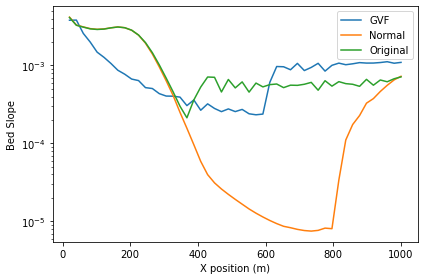

In [22]:
sims = load_sims(25000)
#plot_sim_width(sims)
plot_sim_slope(sims)


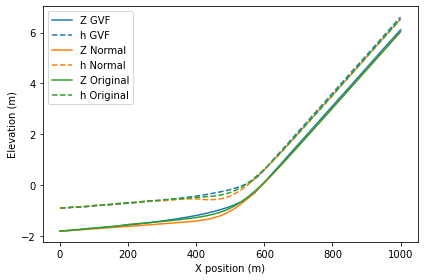

(-2.0, 1.0)

In [23]:
sims = load_sims(8000)
plot_sim_profiles(sims)
xlim([400,600])
ylim([-2,1])

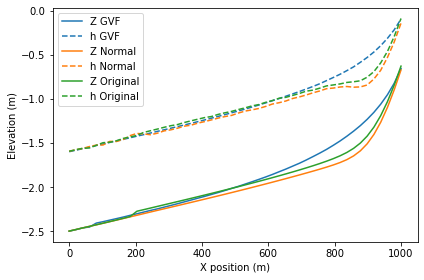

In [14]:
sims = load_sims(15000)
plot_sim_profiles(sims)


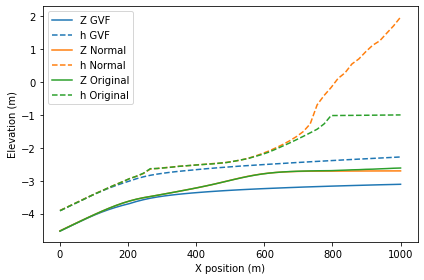

In [25]:
sims = load_sims(35000)
plot_sim_profiles(sims)

In [29]:
ioff()
for i in arange(1,201):
    snapnum = i*1000
    sims = load_sims(snapnum)
    figure(figsize=(6,12))
    subplot(311)
    plot_sim_profiles(sims)
    subplot(312)
    plot_sim_width(sims)
    ylim([0, 5.5])
    subplot(313)
    plot_sim_slope(sims)
    ylim([5e-6, 2e-1])
    timestep_str = "%08d" % (snapnum)
    figpath = os.path.join(base_dir, 'comp-figs', 'Profile-width-comparison-'+timestep_str+'.jpg')
    savefig(figpath)
    close()

Notes: solvers seem to give quite similar results. Biggest differences occur during incision from weak into strong layer. Normal flow and original solver build up steeper knick near bottom as well as deep flow zone in flat spot above knick. Interplay between width and slope produces an oscillation for the normal and original solvers that is not present in GVF solver.

In [88]:
size(5)

1

Next step. Look at simulations with changing uplift. Need to edit runSim to enable passing a list of uplifts and associating switching times. (runSim now allows this and sims are run)

In [34]:
ioff()
for i in arange(1,201):
    snapnum = i*1000
    sims = load_sims(snapnum,
                     dirs=['gvf-uplift-figs', 'norm-uplift-figs', 'orig-uplift-figs'],
                     names=['GVF', 'Normal', 'Original'], 
                     base_dir='/home/mcoving/ChampOutputs/from-rene-2022-11-30/')
    figure(figsize=(6,12))
    subplot(311)
    plot_sim_profiles(sims)
    subplot(312)
    plot_sim_width(sims)
    ylim([0, 5.5])
    subplot(313)
    plot_sim_slope(sims)
    ylim([5e-6, 2e-1])
    timestep_str = "%08d" % (snapnum)
    figpath = os.path.join('/home/mcoving/ChampOutputs/from-rene-2022-11-30/', 'uplift-comp-figs', 'Profile-width-comparison-'+timestep_str+'.jpg')
    savefig(figpath)
    close()

No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such sna

Different uplift sims seem pretty similar, though the normal case becomes unstable during second uplift switch. The GVF solver seems to be unstable at the final configuration with width and bed slope interacting in a runaway instability.

In [62]:
ioff()
for i in arange(1,201):
    snapnum = i*1000
    sims = load_sims(snapnum,
                     dirs=['gvf-uplift-figs', 'gvf-uplift-figs/spim', 'norm-uplift-figs'],
                     names=['GVF', 'GVF-spim', 'Normal'], 
                     base_dir='/home/mcoving/ChampOutputs/from-rene-2022-11-30/')
    figure(figsize=(6,12))
    subplot(311)
    plot_sim_profiles(sims, with_head=False)
    subplot(312)
    only_width = {key: val for key,
                  val in sims.items() if not ('spim' in key)}
    plot_sim_width(only_width)
    ylim([0,4])
    subplot(313)
    plot_sim_slope(sims)
    ylim([5e-6, 2e-1])
    timestep_str = "%08d" % (snapnum)
    figpath = os.path.join('/home/mcoving/ChampOutputs/from-rene-2022-11-30/', 'gvf-uplift-spim-comp-figs', 'Profile-width-comparison-'+timestep_str+'.jpg')
    savefig(figpath)
    close()

No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such sna

Dynamics of width adjusting channels are more diffusive because of non-local effects driven by width adjustment. 

In [64]:
sims

{}

In [1]:
from champ.viz.make_spim_plots_from_snapshots import *

In [62]:
sims

{}

In [83]:
gvf_slopes = []
spim_slopes = []
widths = []
gvf_x = []
spim_x = []
tau_mean = []
norm_fd = []
gvf_fd = []
for i in arange(1,201):
    snapnum = i*1000
    print(snapnum)
    sims = load_sims(snapnum,
                     dirs=['gvf-uplift-figs', 'gvf-uplift-figs/spim', 'norm-uplift-figs'],
                     names=['GVF', 'GVF-spim', 'Normal'], 
                     base_dir='/home/mcoving/ChampOutputs/from-rene-2022-11-30/')
    gvf_slopes.append(sims['GVF'].slopes)
    spim_slopes.append(sims['GVF-spim'].slopes)
    widths.append(sims['GVF'].W)
    norm_fd.append(sims['Normal'].fd_mids)
    gvf_fd.append(sims['GVF'].fd)
    gvf_x.append(sims['GVF'].x_arr)
    spim_x.append(sims['GVF-spim'].x_arr)    
    these_T_b_mean = np.zeros(len(sims['GVF'].xcs))
    for i, xc in enumerate(sims['GVF'].xcs):
        these_T_b_mean[i] = xc.T_b.mean()
    tau_mean.append(these_T_b_mean)
       

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
No such snapshot file.


KeyError: 'Normal'

In [84]:
widths = array(widths)
spim_slopes = array(spim_slopes)
spim_x = array(spim_x)
gvf_slopes = array(gvf_slopes)
gvf_x = array(gvf_x)
tau_mean = array(tau_mean)
norm_fd = array(norm_fd)
gvf_fd = array(gvf_fd)
print(shape(widths))
print(shape(spim_slopes))
print(shape(spim_x))

(81, 50)
(81, 999)
(80, 1000)


Text(0.5, 0, 'timestep')

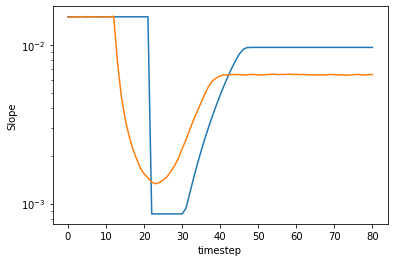

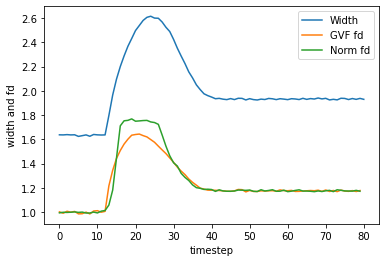

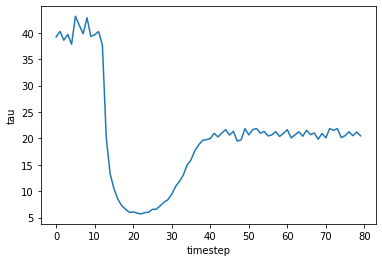

In [91]:
#semilogy(spim_x[0][:-1],spim_slopes[0][:])
figure()
semilogy(spim_slopes[:,918])
semilogy(gvf_slopes[:,45])
#xlim([10,15])
ylabel('Slope')
xlabel('timestep')
figure()
plot(widths[:,45])
plot(gvf_fd[:,45]*2)
plot(norm_fd[:,45]*2)
#xlim([10,15])
legend(['Width', 'GVF fd', 'Norm fd'])
ylabel('width and fd')
xlabel('timestep')
figure()
plot(tau_mean[:,45])
ylabel('tau')
xlabel('timestep')


Why does knickpoint travel faster for width-adjusting channels (gvf and norm)? Is celerity a function of width? Probably so. 

In [92]:
print(spim_x[0,918])
print(gvf_x[0,45])
print(spim_x[0,510])
print(gvf_x[0,25])

918.918918918919
918.3673469387755
510.5105105105105
510.2040816326531


Text(0, 0.5, 'slope')

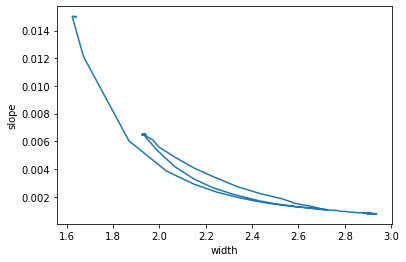

In [82]:
plot(widths[:,25], gvf_slopes[:,25])
xlabel('width')
ylabel('slope')


Text(0, 0.5, 'tau')

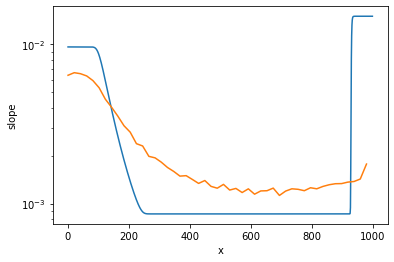

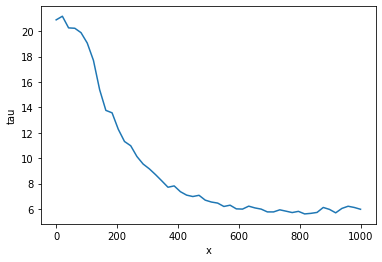

In [97]:
t = 22
semilogy(spim_x[t,:-1],spim_slopes[t,:])
semilogy(gvf_x[t,:-1],gvf_slopes[t,:])
xlabel('x')
ylabel('slope')
figure()
plot(gvf_x[t,:],tau_mean[t,:])
xlabel('x')
ylabel('tau')

Text(0, 0.5, 'tau')

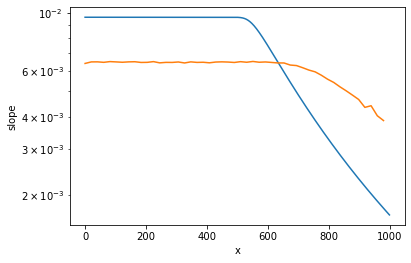

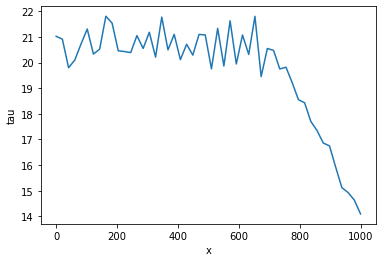

In [96]:
t = 35
semilogy(spim_x[t,:-1],spim_slopes[t,:])
semilogy(gvf_x[t,:-1],gvf_slopes[t,:])
xlabel('x')
ylabel('slope')
figure()
plot(gvf_x[t,:],tau_mean[t,:])
xlabel('x')
ylabel('tau')

## n=1 cases

In [99]:
gvf_slopes = []
spim_slopes = []
widths = []
gvf_x = []
spim_x = []
tau_mean = []
norm_fd = []
gvf_fd = []
for i in arange(1,201):
    snapnum = i*1000
    print(snapnum)
    sims = load_sims(snapnum,
                     dirs=['gvf-uplift-n1-figs', 'norm-uplift-n1-figs/spim', 'norm-uplift-n1-figs'],
                     names=['GVF', 'GVF-spim', 'Normal'], 
                     base_dir='/home/mcoving/ChampOutputs/n_1_sims/')
    gvf_slopes.append(sims['GVF'].slopes)
    spim_slopes.append(sims['GVF-spim'].slopes)
    widths.append(sims['GVF'].W)
    norm_fd.append(sims['Normal'].fd_mids)
    gvf_fd.append(sims['GVF'].fd)
    gvf_x.append(sims['GVF'].x_arr)
    spim_x.append(sims['GVF-spim'].x_arr)    
    these_T_b_mean = np.zeros(len(sims['GVF'].xcs))
    for i, xc in enumerate(sims['GVF'].xcs):
        these_T_b_mean[i] = xc.T_b.mean()
    tau_mean.append(these_T_b_mean)
       

1000


AttributeError: 'spim' object has no attribute 'W'